## Titanic Test

In [1]:
import pandas as pd
import importlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import simple_nn.simple_nn as snn
importlib.reload(snn)

<module 'simple_nn.simple_nn' from 'C:\\Users\\Jonordona\\Desktop\\data_resources\\DeepLearning\\simple_nn\\simple_nn.py'>

### Data

In [192]:
data = pd.read_csv('data/titanic/train.csv')
data['FamNum'] = data.SibSp + data.Parch
data['Gender'] = (data['Sex'] == 'female').astype(int)

In [198]:
relevant = data[['Pclass', 'Gender', 'Age', 'FamNum', 'Fare', 'Survived']].dropna()

features = relevant[['Pclass', 'Gender', 'Age', 'FamNum', 'Fare']]
survived = relevant[['Survived']]

features=(features-features.mean())/features.std()
X = np.asmatrix(features.to_numpy())
Y = np.asmatrix(survived)

In [199]:
separator = int(X.shape[0] * 0.7) + 1

In [200]:
X_train = X[0:separator]
Y_train = Y[0:separator]

X_test = X[separator:]
Y_test = Y[separator:]

### Hyperparameters

In [203]:
layers = 5
units_per_layer = [5, 8, 8, 6, 1]
l_rate = 0.001
iterations = 50000

### NN Training

In [204]:
nn = snn.NeuralNetwork(layers, units_per_layer, l_rate, iterations)
np.random.seed(2)
nn.initialize_params(X_train.transpose())

In [205]:
nn.optimize(X_train.transpose(), Y_train.transpose())

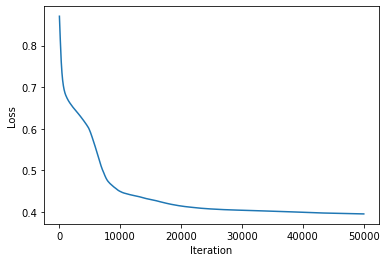

In [206]:
plt.plot(nn.train_cost)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [207]:
train_accuracy = (nn.predict(X_train.transpose()) == Y_train.T).mean()
train_accuracy

0.838

In [208]:
test_accuracy = (nn.predict(X_test.transpose()) == Y_test.T).mean()
test_accuracy

0.8364485981308412